### Laboratory Task 9: Grey-Level Difference Statistics (GLDS) Feature Extraction

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

### Load a Sample Image & Convert to Grayscale


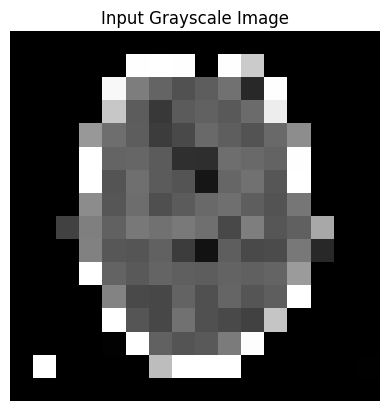

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Load image
img = cv2.imread('/content/CT.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (16, 16))  # Resize to 16x16
plt.imshow(img, cmap='gray')
plt.title("Input Grayscale Image")
plt.axis('off')
plt.show()

###  GLDS: Compute Absolute Differences

In [ ]:
import numpy as np
from collections import Counter

# Function to compute GLDS difference values in a specific direction
def get_glds_differences(img, direction):
    diffs = []
    rows, cols = img.shape

    for i in range(rows):
        for j in range(cols):
            try:
                if direction == 0 and j+1 < cols:
                    diff = abs(int(img[i, j]) - int(img[i, j+1]))
                elif direction == 45 and i-1 >= 0 and j+1 < cols:
                    diff = abs(int(img[i, j]) - int(img[i-1, j+1]))
                elif direction == 90 and i-1 >= 0:
                    diff = abs(int(img[i, j]) - int(img[i-1, j]))
                elif direction == 135 and i-1 >= 0 and j-1 >= 0:
                    diff = abs(int(img[i, j]) - int(img[i-1, j-1]))
                else:
                    continue
                diffs.append(diff)
            except:
                continue
    return diffs



### Compute Probability Distributions

In [ ]:
def compute_probabilities(diffs):
    total = len(diffs)
    counter = Counter(diffs)
    probs = {k: v / total for k, v in counter.items()}
    return probs


### Define Texture Features

In [ ]:
import math

def compute_features(probs):
    ASM = sum([p**2 for p in probs.values()])
    Contrast = sum([d**2 * p for d, p in probs.items()])
    Entropy = -sum([p * math.log2(p) for p in probs.values() if p > 0])
    Mean = sum([d * p for d, p in probs.items()])
    return ASM, Contrast, Entropy, Mean


### Full Pipeline – Compute for All Directions

In [ ]:
directions = [0, 45, 90, 135]

for d in directions:
    diffs = get_glds_differences(img, d)
    probs = compute_probabilities(diffs)
    asm, contrast, entropy, mean = compute_features(probs)

    print(f"\nDirection {d}°:")
    print(f"ASM: {asm:.4f}")
    print(f"Contrast: {contrast:.4f}")
    print(f"Entropy: {entropy:.4f}")
    print(f"Mean: {mean:.4f}")



Direction 0°:
ASM: 0.1877
Contrast: 7949.4542
Entropy: 4.3792
Mean: 45.8125

Direction 45°:
ASM: 0.1448
Contrast: 9102.6000
Entropy: 4.7465
Mean: 53.6933

Direction 90°:
ASM: 0.2015
Contrast: 7163.2167
Entropy: 4.3153
Mean: 42.1333

Direction 135°:
ASM: 0.1449
Contrast: 9679.3556
Entropy: 4.7547
Mean: 55.3111


## Visualize

In [ ]:
original_img = cv2.imread('/content/CT.jpg', cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img, (16, 16))  # Resize to 16x16

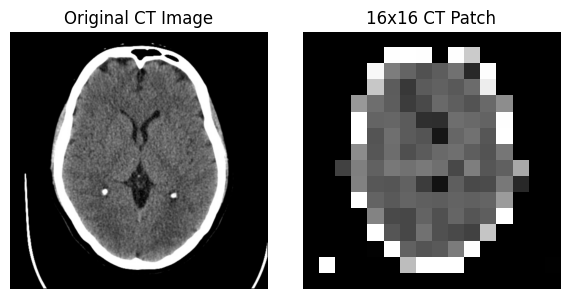

In [ ]:
# Show original image (if you have it)
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.imshow(original_img, cmap='gray')
plt.title("Original CT Image")
plt.axis('off')

# Show 16x16 patch
plt.subplot(1, 2, 2)
plt.imshow(img_resized, cmap='gray')
plt.title("16x16 CT Patch")
plt.axis('off')
plt.tight_layout()
plt.show()


### Frequency Table of Gray-Level Differences

In [ ]:
from collections import Counter
import numpy as np

def compute_glds_differences(img, angle=(0, 1)):
    diffs = []
    rows, cols = img.shape
    for i in range(rows):
        for j in range(cols):
            ni, nj = i + angle[0], j + angle[1]
            if 0 <= ni < rows and 0 <= nj < cols:
                diff = abs(int(img[i, j]) - int(img[ni, nj]))
                diffs.append(diff)
    return diffs

# Compute differences for 0°
differences = compute_glds_differences(img_resized, angle=(0, 1))
freq_table = dict(Counter(differences))
print("Frequency Table of Absolute Differences:")
for k in sorted(freq_table):
    print(f"Δ={k} -> {freq_table[k]}")


Frequency Table of Absolute Differences:
Δ=0 -> 102
Δ=1 -> 4
Δ=2 -> 6
Δ=3 -> 1
Δ=4 -> 2
Δ=5 -> 1
Δ=6 -> 3
Δ=7 -> 5
Δ=8 -> 3
Δ=9 -> 1
Δ=10 -> 3
Δ=11 -> 6
Δ=12 -> 2
Δ=13 -> 2
Δ=14 -> 3
Δ=16 -> 1
Δ=17 -> 3
Δ=19 -> 2
Δ=20 -> 2
Δ=21 -> 2
Δ=22 -> 1
Δ=23 -> 2
Δ=25 -> 1
Δ=27 -> 2
Δ=28 -> 1
Δ=30 -> 2
Δ=32 -> 1
Δ=33 -> 3
Δ=35 -> 2
Δ=36 -> 2
Δ=38 -> 1
Δ=39 -> 1
Δ=40 -> 1
Δ=41 -> 1
Δ=42 -> 4
Δ=44 -> 1
Δ=45 -> 1
Δ=51 -> 1
Δ=54 -> 2
Δ=55 -> 1
Δ=59 -> 1
Δ=62 -> 2
Δ=64 -> 1
Δ=65 -> 1
Δ=66 -> 1
Δ=72 -> 2
Δ=76 -> 1
Δ=79 -> 1
Δ=80 -> 1
Δ=107 -> 1
Δ=118 -> 1
Δ=123 -> 1
Δ=129 -> 1
Δ=130 -> 2
Δ=132 -> 2
Δ=140 -> 1
Δ=141 -> 1
Δ=152 -> 1
Δ=155 -> 3
Δ=156 -> 1
Δ=157 -> 1
Δ=161 -> 1
Δ=168 -> 1
Δ=169 -> 1
Δ=170 -> 1
Δ=171 -> 1
Δ=189 -> 1
Δ=197 -> 1
Δ=199 -> 1
Δ=203 -> 1
Δ=213 -> 1
Δ=237 -> 1
Δ=248 -> 1
Δ=253 -> 2
Δ=254 -> 5
Δ=255 -> 9


### Bar plot of pδ(i)

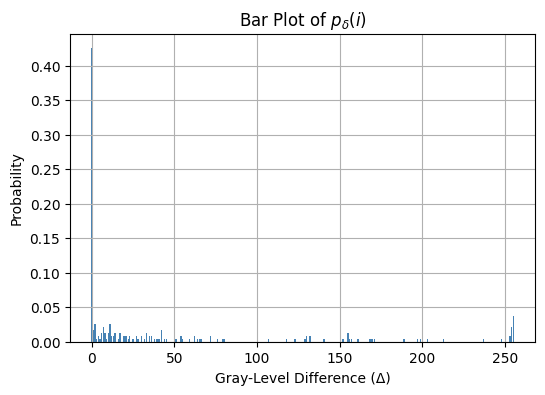

In [ ]:
import matplotlib.pyplot as plt

# Normalize frequencies to get pδ(i)
total = sum(freq_table.values())
p_delta = {k: v / total for k, v in freq_table.items()}

# Plot
plt.figure(figsize=(6, 4))
plt.bar(p_delta.keys(), p_delta.values(), color='steelblue')
plt.title("Bar Plot of $p_\delta(i)$")
plt.xlabel("Gray-Level Difference (Δ)")
plt.ylabel("Probability")
plt.grid(True)
plt.show()


### Extracted feature values

In [ ]:
directions = [0, 45, 90, 135]

for d in directions:
    diffs = get_glds_differences(img, d)
    probs = compute_probabilities(diffs)
    asm, contrast, entropy, mean = compute_features(probs)

    print(f"\nDirection {d}°:")
    print(f"ASM: {asm:.4f}")
    print(f"Contrast: {contrast:.4f}")
    print(f"Entropy: {entropy:.4f}")
    print(f"Mean: {mean:.4f}")



Direction 0°:
ASM: 0.1877
Contrast: 7949.4542
Entropy: 4.3792
Mean: 45.8125

Direction 45°:
ASM: 0.1448
Contrast: 9102.6000
Entropy: 4.7465
Mean: 53.6933

Direction 90°:
ASM: 0.2015
Contrast: 7163.2167
Entropy: 4.3153
Mean: 42.1333

Direction 135°:
ASM: 0.1449
Contrast: 9679.3556
Entropy: 4.7547
Mean: 55.3111


### Organize in a Summary Table

In [ ]:
import pandas as pd

features = {
    "Direction": "0°",
    "Contrast": contrast,
    "ASM": asm,
    "Entropy": entropy,
    "Mean": mean
}

df_summary = pd.DataFrame([features])
df_summary


,Direction,Contrast,ASM,Entropy,Mean
0,0°,9679.355556,0.144889,4.754729,55.311111


## Observations
Contrast is highest in the 135° direction, suggesting this direction captures the strongest intensity variation and edge detail.

ASM (Angular Second Moment) is highest in 90°, indicating more homogeneity in this direction (i.e., pixel intensities are more similar).

Entropy is highest for 135° and 45°, indicating more complexity and less predictability in these directions.

Mean gray-level difference is also highest for 135°, aligning with its high contrast and entropy values.

## Conclusions
The GLDS-based analysis revealed that the 135° direction contains the most detailed textural variations in the CT patch, making it most suitable for tasks involving edge detection or segmentation. The 90° direction, with higher ASM, shows smoother regions. These directional insights help in understanding spatial patterns in medical images, aiding in better feature selection for diagnostic models.